# Importing required Modules and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Loading the Abalone Dataset

In [2]:
#importing the red wine dataset (in csv format)
#we are storing our dataset in "df" variable to make our job easier.
df=pd.read_csv(r'C:\Users\Sony\Desktop\abalone.csv')

checking the first five rows of the dataset in order to get general idea of features and variables.

checking the input variables and output variables.

the head() function used to view the preview of the data for given number of rows,if no value 
is given then bydefault it will display first five rows.

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Exploring the Dataset

Once the importing of the dataset is done,we get the rough idea of the dataset as below--

this dataset contains features necessary to check the age of the Abalone species.

so here "Rings" is the dependent or output variable.More rings more age

it is the time to make complete "Exploratory Data Analysis i.e. EDA"

Let's start it with checking the number of rows and columns in the given Dataset-->

In [4]:
df.shape

(4177, 9)

this dataset contains 4177 rows and 9 columns.

Now lets check the name of all the columns this dataset have so that it is easy for us to --

--view the names of columns in easier way and make further analysis on them--

In [5]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In the above output we can clearly see the names of all columns.

now by observing the dataset and column names it is clear that feature "Rings" is dependent--

--variable and all other features are independent.

For further analysis we have to check the datatypes of values of each column-->

In [6]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

from above output it is clear that variable "Sex" is of categorical type and remaining all are int/
float type

# Checking the Missing Values in Dataset

In [7]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

that's great ,we have no null values in the given dataset,it makes our job easy...isn't it?

# Statistical Summary of the Dataset

now lets see the summary of the statistics of the dataset pertaining to the dataset columns,

like mean,median,mode,standard deviation and IQR values.

as the whole dataset is numeric so no need to worry for the dropping of any column as below function-

--only works on numerical data

In [8]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


According to Described Information:

1)No Feature has Minimum Value = 0, except Height

2)All Features are not Normally Distributed, ( Theortically if feature is normally distributed,
  
  Mean = Median = Mode ).

3)But Features are close to Normality

4)All numerical, Except Sex

5)Each Feature has Different Scale

# Outliers Detection

plotting the Boxplot for detecting the outliers present in Dataset

In [9]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

[Text(0, 0.5, 'Rings'),
 Text(0.5, 0, 'Shucked weight'),
 Text(0.5, 1.0, 'Box Plot On Rings wrt to Shucked weight')]

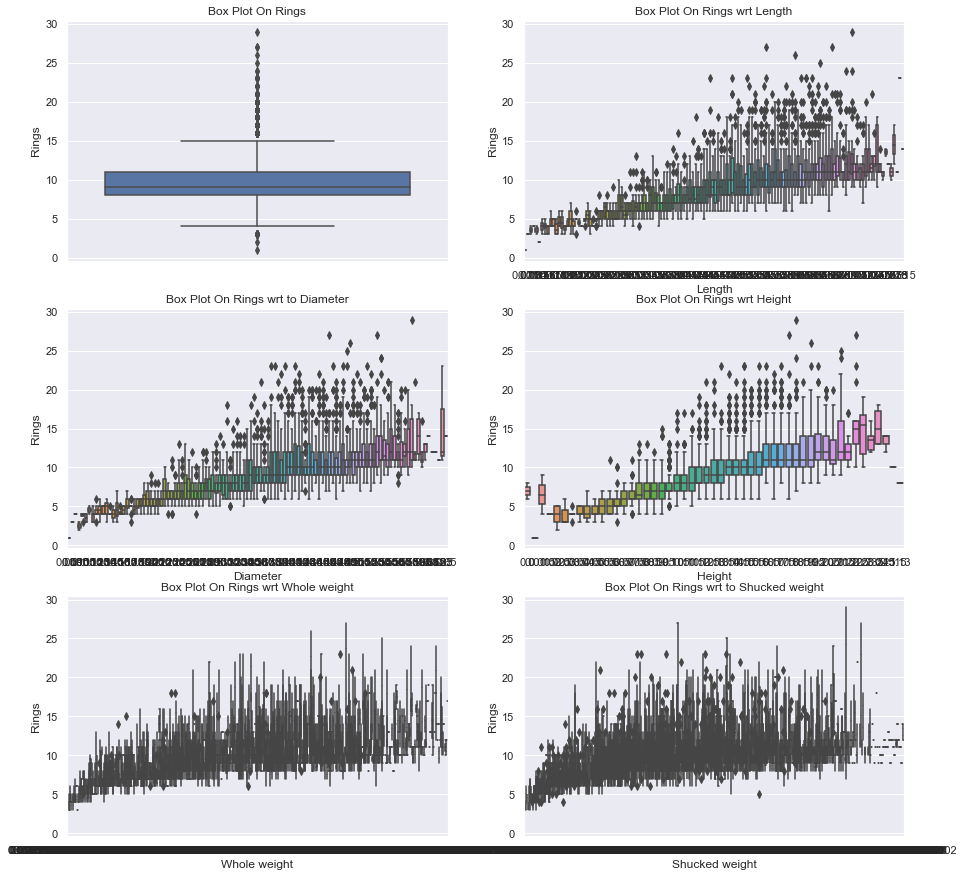

In [10]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=df,y="Rings",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="Rings",x="Length",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="Rings",x="Diameter",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="Rings",x="Height",orient="v",ax=axes[1][1])
sns.boxplot(data=df,y="Rings",x="Whole weight",orient="v",ax=axes[2][0])
sns.boxplot(data=df,y="Rings",x="Shucked weight",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Rings',title="Box Plot On Rings")
axes[0][1].set(xlabel='Length', ylabel='Rings',title="Box Plot On Rings wrt Length")
axes[1][0].set(xlabel='Diameter', ylabel='Rings',title="Box Plot On Rings wrt to Diameter")
axes[1][1].set(xlabel='Height', ylabel='Rings',title="Box Plot On Rings wrt Height")
axes[2][0].set(xlabel='Whole weight', ylabel='Rings',title="Box Plot On Rings wrt Whole weight")
axes[2][1].set(xlabel='Shucked weight', ylabel='Rings',title="Box Plot On Rings wrt to Shucked weight")

In [11]:
'''Numerical Features and Categorical Features'''
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

In [12]:
#list of Numerical Datatypes

nf

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [13]:
#list of Categorical Datatypes

cf

Index(['Sex'], dtype='object')

# Skewness check through Data Visualization

'''Histogram : to see the numeric data distribution'''

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015EDD92FA58>,
      dtype=object)

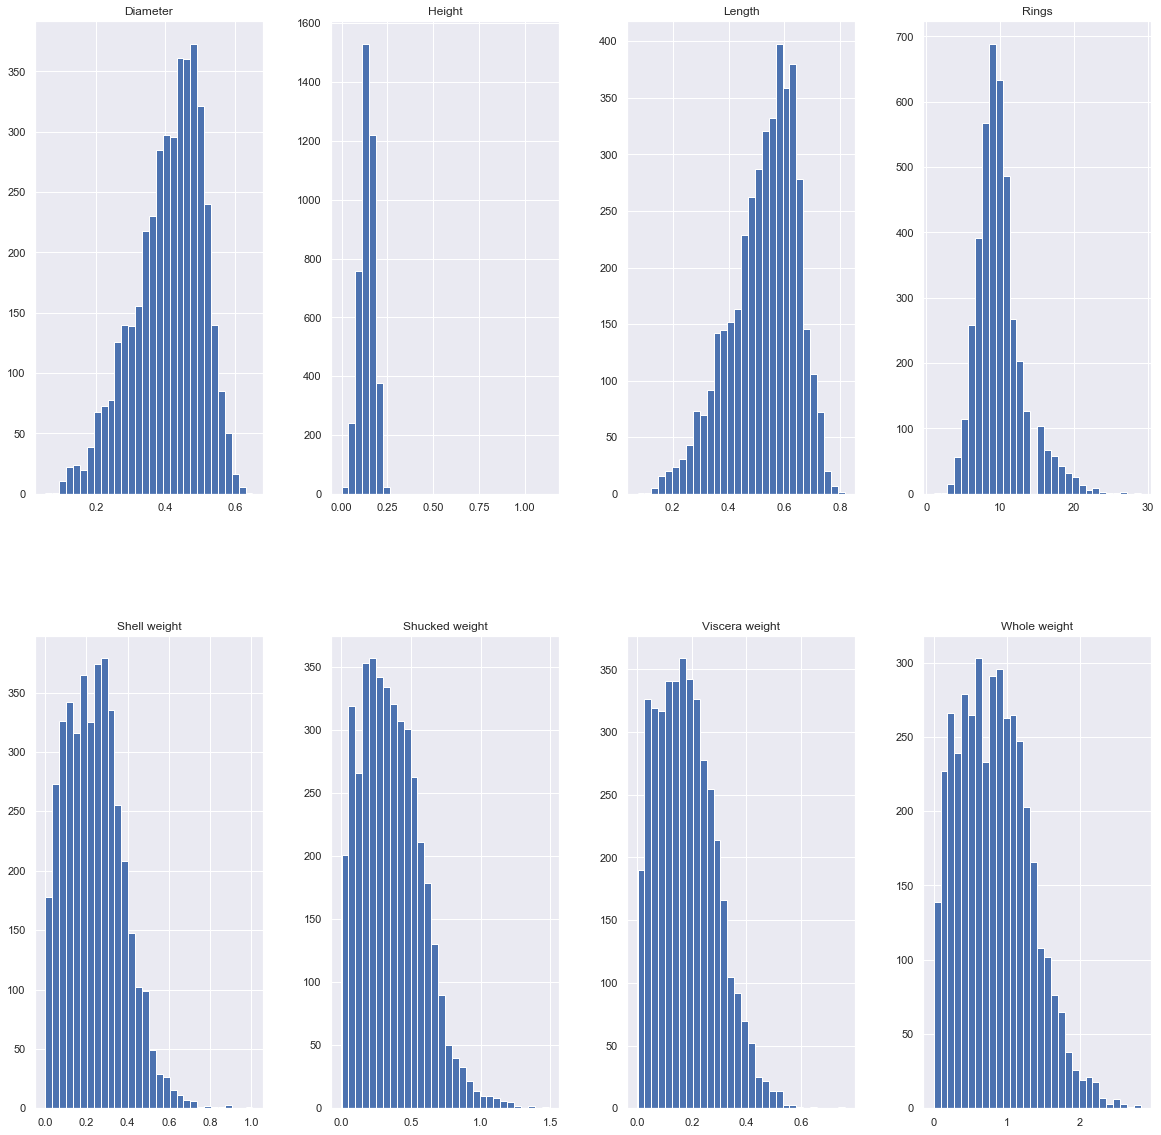

In [14]:
df.hist(figsize=(20,20), grid = True, layout = (2,4), bins = 30)

# Checking the skewness of numeric Data

In [16]:
'''After Seeing Above Graph of Data Distribution, I feel the Data is skewed, So checking for Skewness '''
from scipy.stats import skew
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [17]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


According to the rules

For a normally Distributed Data, Skewness should be greater than 0

Skewness > 0 , More weight is on the right tail of the distribution

In [18]:
'''Target Column Analysis'''
print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
25    0.000239
2     0.000239
26    0.000239
29    0.000239
Name: Rings, dtype: float64


No of Classes In Target

In [19]:
print(len(df.Rings.unique()))

28


# Checking the Correlation between Features/variables

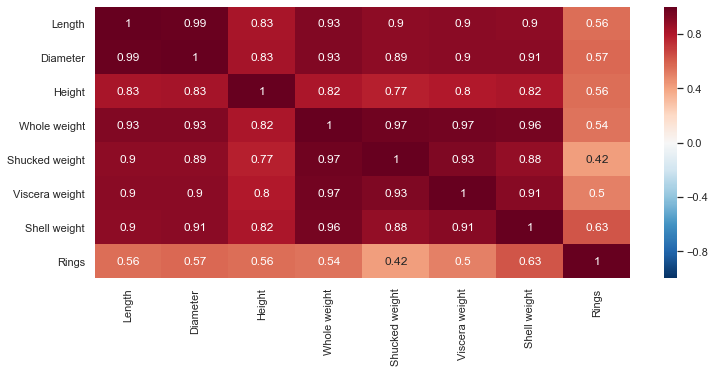

In [20]:
correlation = df.corr()
plt.figure(figsize=(12, 5))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [21]:
correlation['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Name: Rings, dtype: float64

We can observe that all the variables are approx equally correlated with target variable.

This means that, they need to be further analysed for detailed pattern and corelation exploration.

Hence, we will use all variables in our future analysis

# Univariate and Bivariate analysis of Dataset

Let's check how many unique values does the target feature 'Rings' has?

In [23]:
df["Rings"].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

And how data is distributed among those values?

In [24]:
df.Rings.value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

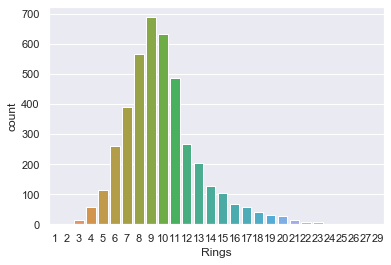

In [25]:
#plotting the graph for visualizing better the distribution of "quality" variable.
sns.countplot(x='Rings', data=df)

The above distribution shows the range for response variable (Rings) is between 3 to 23.

In [26]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

Lets check for distribution for 'Sex' variable

M- Male

F- Female

I- Infant

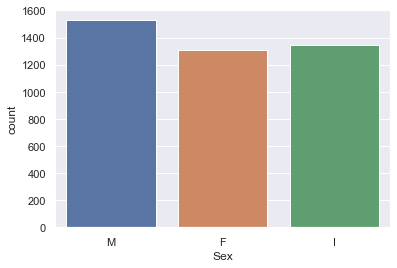

In [27]:
sns.countplot(x='Sex', data = df)

In [28]:
'''Sex Ratio in Abalone'''
print("\nSex Count in Percentage")
print(df.Sex.value_counts(normalize = True))
print("\nSex Count in Numbers")
print(df.Sex.value_counts())


Sex Count in Percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

Sex Count in Numbers
M    1528
I    1342
F    1307
Name: Sex, dtype: int64


In [29]:
'''Small Feature Engineering, Deriving Age from Rings Column, Age = Rings + 1.5'''

df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

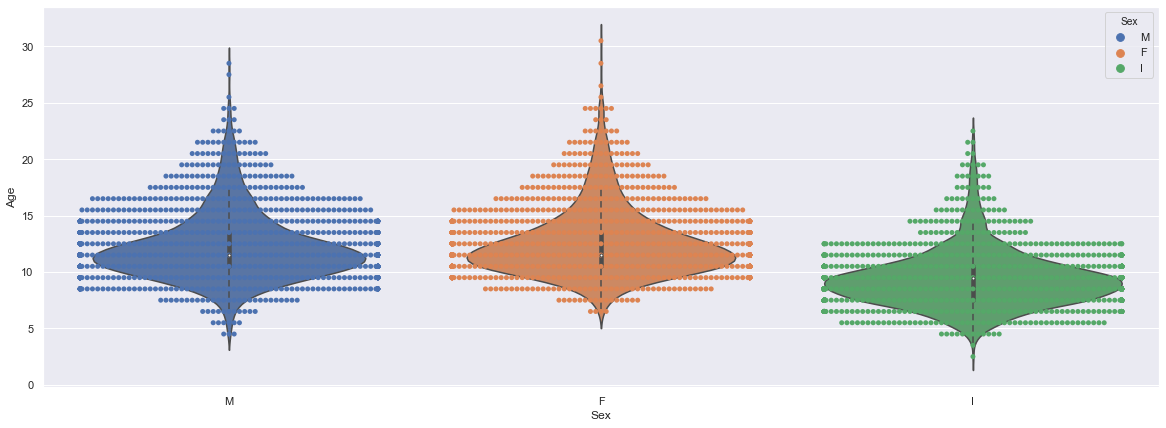

In [30]:
'''Sex and Age Visulization'''
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)

According to The above Graph

Male : Majority Between 7.5 to 19

Female : Majority Between 8 to 19

Infant : Majority Between 6 to < 10

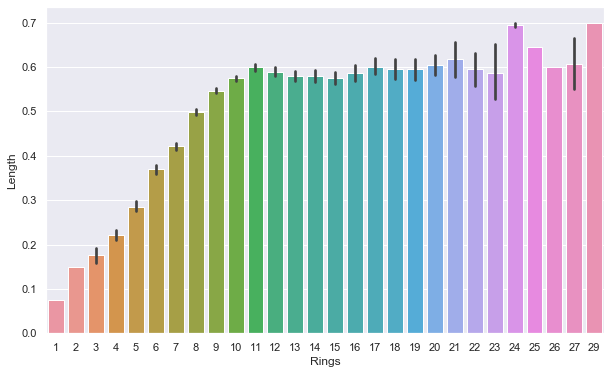

In [31]:
'''Check visualization between Rings and Length'''

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Length', data = df)

We are seeing that 'Rings' is increasing as 'Length' is increasing.Means more age more the length

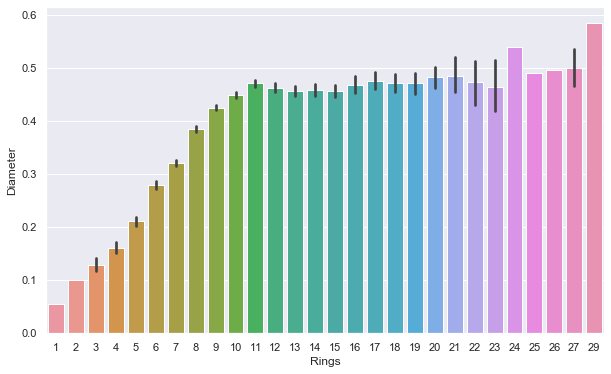

In [32]:
'''relation between Rings and Diameter'''

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Diameter', data = df)

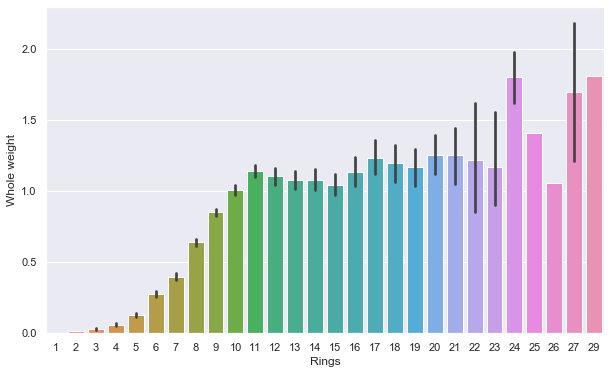

In [34]:
'''Relation between Rings and Whole weight'''

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Whole weight', data = df)

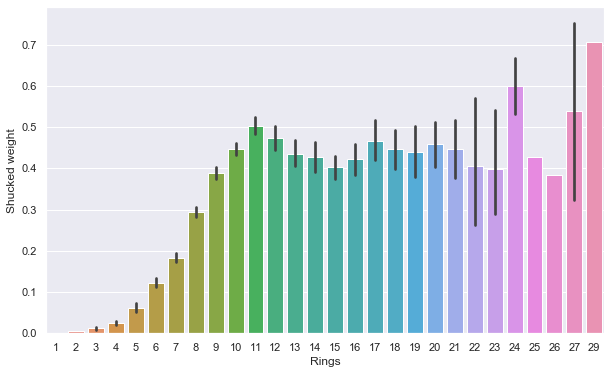

In [35]:
'''Relation between Rings and Shucked weight'''

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Shucked weight', data = df)

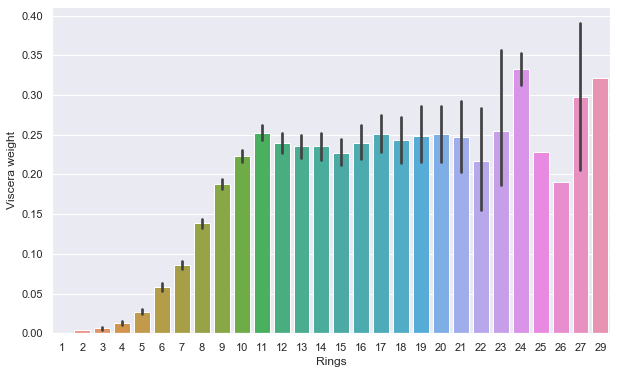

In [36]:
'''Relation between Rings and Viscera weight'''

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Viscera weight', data = df)

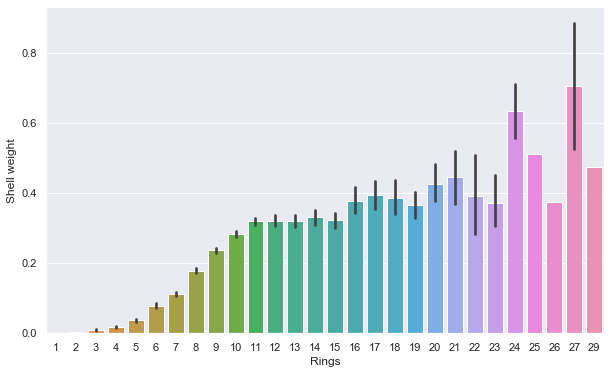

In [37]:
'''Relation between Rings and Shell weight'''

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Rings', y = 'Shell weight', data = df)

# Data in Tabular Form -Grouped by 'Sex'

Taking the means of all values in each column and arranging them in descending order,,groupby="Sex"

In [38]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight','Viscera weight', 'Shell weight', 'Age']].mean().sort_values(by = 'Age',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


# Pre Processing, Label Encoding  and Cleaning of Dataset before further Analysis

In [49]:
'''LabelEnconding the Categorical Data'''
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

In [51]:
df['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

0=  Female
1=  Infant
2=  Male

lets plot them in graph to visualize it

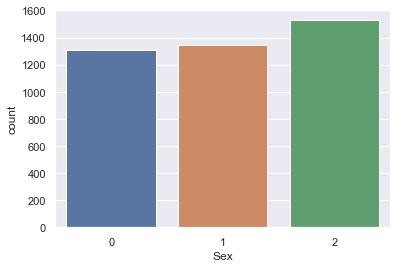

In [52]:
sns.countplot(df['Sex'])

# Now performing Train_Test_Split to separate target and input variables

seperating the dataset as response variable and feature variabes

In [53]:
'''Learning Features and Predicting Features'''
x_train = df.drop(['Rings','Age','Sex'], axis = 1)
y_train = df['Rings']

In [54]:
'''Train Test Split , 70:30 Ratio'''
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

In [55]:
x_train.shape

(2798, 10)

In [56]:
x_test.shape

(1379, 10)

In [57]:
y_train.shape

(2798,)

In [58]:
y_test.shape

(1379,)

# Applying Standardiztion Technique to get optimized results through Standard Scaler

In [59]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

Our training and testing data is ready now to perform machine learning algorithm

# Applying classification to the target variable 'Rings'

No of Classes : 2

1 - Rings > 10

0 - Rings <= 10

In [60]:
'''Creating New Target Variable '''
df['newRings'] = np.where(df['Rings'] > 10,1,0)

In [61]:
'''Learning Features and Predicting Features'''
x_train = df.drop(['newRings','Rings','Age','Sex'], axis = 1)
y_train = df['newRings']

In [63]:
'''Train Test Split , 70:30 Ratio'''
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

# Model Selection

The target variable in the given dataset is being converted into classifications hence the problem 

becomes classification problem.

Therefore the machine learning algorithms of classification can be applied here in for training and 

testing of data.

We will check for the best model one by one

# Applying various Machine Learning Models to Train and test the Dataset

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [65]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [66]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n ')

0.7722987672226251
[[801 122]
 [192 264]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       923
           1       0.68      0.58      0.63       456

    accuracy                           0.77      1379
   macro avg       0.75      0.72      0.73      1379
weighted avg       0.77      0.77      0.77      1379


 
0.6860043509789703
[[624 299]
 [134 322]]
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       923
           1       0.52      0.71      0.60       456

    accuracy                           0.69      1379
   macro avg       0.67      0.69      0.67      1379
weighted avg       0.72      0.69      0.69      1379


 
0.751269035532995
[[852  71]
 [272 184]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       923
           1       0.72      0.40      0.52       456

    accuracy                           0.75      13

In [67]:
from sklearn.neighbors import KNeighborsClassifier as knn

# Checking Consistency on KNN Model using Cross Validation

In [104]:
score=cross_val_score(knn(n_neighbors=18,),X=x_train, y=y_train,cv=10)

In [105]:
score

array([0.77224199, 0.76428571, 0.77857143, 0.75357143, 0.79642857,
       0.79285714, 0.79642857, 0.77419355, 0.74910394, 0.74910394])

In [106]:
score.mean()*100,score.std()*100

(77.26786283717175, 1.7662277512377134)

In [117]:
clf=knn(n_neighbors=18)
clf.fit(x_train,y_train)
score1=clf.score(x_train,y_train)
score=clf.score(x_test,y_test)
score1,score

(0.7948534667619729, 0.7817258883248731)

the KNN Model above is giving optimal result after cross validation as-

training set== 79.48%
test set=======78.1

In [127]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.20, random_state=56)

In [128]:
'''Creating Object of SVM'''
from sklearn import svm

svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 
'''Learning from Training Set'''
svmModel.fit(X_train, Y_train)
'''Predicting for Training Set'''
Y_pred = svmModel.predict(X_test)
'''Accuracy Score'''
result_acc = accuracy_score(Y_test,Y_pred) 

In [129]:
result_acc

0.8053571428571429

In [130]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [131]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       923
           1       0.72      0.40      0.52       456

    accuracy                           0.75      1379
   macro avg       0.74      0.66      0.68      1379
weighted avg       0.75      0.75      0.73      1379



In [132]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [133]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [134]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.4, 'gamma': 1.4, 'kernel': 'rbf'}

In [138]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.4, gamma =  1.4, kernel= 'rbf')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       923
           1       0.71      0.58      0.64       456

    accuracy                           0.78      1379
   macro avg       0.76      0.73      0.74      1379
weighted avg       0.78      0.78      0.78      1379



SVM model is giving the best result approx 80%.



# Storing the predicted results in csv file

In [140]:
pred_svm = pd.DataFrame(Y_pred, columns=['y_pred']).to_csv('abalone.csv')

# Saving the best Model as a pickle in a file.

I have selected SVM Model as best model as it is giving me best accuracy score after performing overfitting and underfitting

In [142]:
from sklearn.externals import joblib


In [145]:
joblib.dump(svc,'abalone.pkl')

['abalone.pkl']